In [16]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime

In [17]:
data = pd.read_csv('diagnose_merged.csv')
print(data)

        Unnamed: 0  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE  \
0                0           2   163353      1.0     V3001   
1                1           2   163353      2.0      V053   
2                2           2   163353      3.0      V290   
3                3           3   145834      9.0      2639   
4                4           3   145834      7.0      6826   
5                5           3   145834      6.0      4280   
6                6           3   145834      5.0     41071   
7                7           3   145834      8.0      4254   
8                8           3   145834      3.0      5849   
9                9           3   145834      2.0     78559   
10              10           3   145834      1.0      0389   
11              11           3   145834      4.0      4275   
12              12           4   185777      9.0     E9317   
13              13           4   185777      1.0       042   
14              14           4   185777      2.0      1363   
15      

In [39]:
#each diagnosis(ICD9 code) how many patients
#assumed same person not diagnosed  with same disease multiple times = but yes
#count = number of times a disease is diagnosed
#print out ,'SHORT_TITLE'
countdata= data.groupby(['ICD9_CODE'], sort=False).size().reset_index(name='Count')
#countdata= [data.groupby(['ICD9_CODE'], sort=False).size().reset_index(name='Count')]

print(countdata)

     ICD9_CODE  Count
0        V3001   2758
1         V053   5779
2         V290   5519
3         2639   1259
4         6826    732
5         4280  13111
6        41071   3055
7         4254   1709
8         5849   9119
9        78559    535
10        0389   3725
11        4275   1361
12       E9317     30
13         042    538
14        1363     86
15        7994    251
16        2763    984
17        7907   1478
18        5715   1287
19       04111    703
20        V090    658
21       V3000   3566
22       40391   2630
23        4440     54
24        9972    269
25        2766    575
26        2767   2169
27        2859   5406
28        2753    458
29       V1582   2811
...        ...    ...
6954     83813      1
6955      E856      1
6956     E8178      1
6957     52489      1
6958     85103      1
6959     36315      1
6960      9635      1
6961      3154      1
6962     31539      1
6963     83301      1
6964     99741      1
6965     05821      1
6966     87264      1
6967     9

In [40]:
#change col type
#countdata['Count']=pd.to_numeric(countdata['Count'])
countdata['Count'] = countdata['Count'].astype(int)

types = countdata.dtypes
print(types)  

ICD9_CODE    object
Count         int64
dtype: object


In [ ]:
labels = countdata['ICD9_CODE']
#check label number = size number
#sizes = countdata.loc[countdata['Count']>=3000]
sizes = countdata['Count']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:

piedata = countdata.loc[countdata['Count']>=5000]
#check label number = size number
print(piedata)

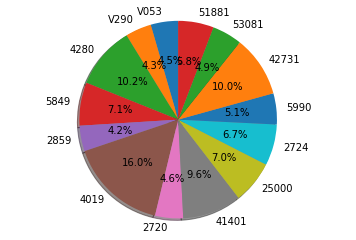

In [35]:
labels = piedata['ICD9_CODE']
#check label number = size number
#sizes = countdata.loc[countdata['Count']>=3000]
sizes = piedata['Count']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()